In [1]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from rdkit.Chem import MolFromPDBFile
from experiment_utils import interactive_alignment_plot_py3dmol
# %matplotlib widget

In [2]:
data_path = "../Data/first_8_molecules_RDKIT"
lig_list = ['1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA']
for ligand in lig_list:
    result = []
    for i in range(50):
        path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
        path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
        molA = MolFromPDBFile(path1, removeHs=True, sanitize=False)
        molB = MolFromPDBFile(path2, removeHs=True, sanitize=False)
        X_A, T_A, B_A = otm.tl.process_rdkit_mol(molA, heavy_atoms_only=True)
        X_B, T_B, B_B = otm.tl.process_rdkit_mol(molB, heavy_atoms_only=True)
        optimal_assignment, rmsd_best, alpha_best, mismatched_bond_best = otm.tl.molecule_alignment_with_perturbation(
            X_A, X_B, T_A, T_B, B_A, B_B, 
            n_perturbation = 1)  
        print(ligand, i, rmsd_best, mismatched_bond_best)
        result.append({
            'nameA': ligand,
            'nameB': ligand+'_conf'+str(i),
            'RMSD(OTMol)': rmsd_best,
            'alpha': alpha_best,
            'mismatch_bond': mismatched_bond_best,
            'assignment': optimal_assignment,
        })
    pd.DataFrame(result).to_csv(('./otmol_output/{}_result.csv'.format(ligand)), index=False)

1ln1_DLP 0 4.960497988345014 0
1ln1_DLP 1 6.512222118643305 0
1ln1_DLP 2 5.569599494357458 1


KeyboardInterrupt: 

In [3]:
data_path = "../Data/first_8_molecules_RDKIT"
lig_list = ['1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA']
ligand = lig_list[0]
i=2
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
molA = MolFromPDBFile(path1, removeHs=True, sanitize=False)
molB = MolFromPDBFile(path2, removeHs=True, sanitize=False)
X_A, T_A, B_A = otm.tl.process_rdkit_mol(molA, heavy_atoms_only=True)
X_B, T_B, B_B = otm.tl.process_rdkit_mol(molB, heavy_atoms_only=True)
optimal_assignment, rmsd_best, alpha_best, mismatched_bond_best = otm.tl.molecule_alignment_with_perturbation(
            X_A, X_B, T_A, T_B, B_A, B_B, 
            n_perturbation = 1)  
print(ligand, i, rmsd_best, mismatched_bond_best)

1ln1_DLP 2 5.569599494357458 1


In [4]:
data_path = "../Data/first_8_molecules_RDKIT"
lig_list = ['1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA']
ligand = lig_list[0]
i=2
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
molA = MolFromPDBFile(path1, removeHs=True, sanitize=False)
molB = MolFromPDBFile(path2, removeHs=True, sanitize=False)
X_A, T_A, B_A = otm.tl.process_rdkit_mol(molA, heavy_atoms_only=True)
X_B, T_B, B_B = otm.tl.process_rdkit_mol(molB, heavy_atoms_only=True)
optimal_assignment, rmsd_best, alpha_best, mismatched_bond_best = otm.tl.molecule_alignment_with_perturbation(
            X_A, X_B, T_A, T_B, B_A, B_B, 
            n_perturbation = 0)  
print(ligand, i, rmsd_best, mismatched_bond_best)

1ln1_DLP 2 5.569599494357458 1


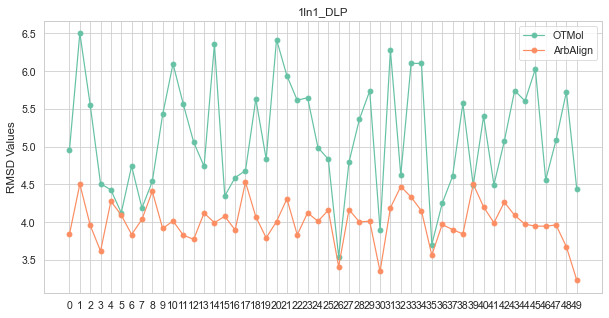

In [6]:
arbalign_res = pd.read_csv('./arbalign_output/1ln1_DLP_result.csv')
otmol_res = pd.read_csv('./otmol_output/1ln1_DLP_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'}), 
    otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    ], axis=1)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.plot(range(0,50), combined_df["OTMol"], marker='o', label="OTMol", clip_on=False, zorder=10)
plt.plot(range(0,50), combined_df["ArbAlign"], marker='o', label="ArbAlign", clip_on=False, zorder=10)
plt.title("1ln1_DLP")
plt.xlabel("")
plt.ylabel("RMSD Values")
#plt.ylim(0, 2)
plt.xticks(range(0,50))
#plt.xlim(2,20)
plt.legend()
plt.grid(True)
#plt.savefig('../images/S1MAW1_element_name.png', dpi=300, bbox_inches='tight')

In [2]:
df = pd.read_csv('./otmol_output/1ln1_DLP_result.csv')
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '1ln1_DLP'
i = 0
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
molA = MolFromPDBFile(path1, removeHs=True, sanitize=False)
molB = MolFromPDBFile(path2, removeHs=True, sanitize=False)
X_A, T_A, B_A = otm.tl.process_rdkit_mol(molA)
X_B, T_B, B_B = otm.tl.process_rdkit_mol(molB, heavy_atoms_only=True)
assignment = [int(x) for x in df['assignment'][i].strip('[]').split()]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

In [3]:
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '1ln1_DLP'
i = 0
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.xyz')
path2 = os.path.join('arbalign_output', ligand+'_conf'+str(i)+'-aligned_to-'+ligand+'.xyz')
molA = next(pybel.readfile("xyz", path1))
molB = next(pybel.readfile("xyz", path2))
X_A, T_A, B_A = otm.tl.process_molecule(molA, heavy_atoms_only=True) 
X_B, T_B, B_B = otm.tl.process_molecule(molB, heavy_atoms_only=True)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

3.8400934103533766
